### 1. Import Libraries

In [ ]:
# Importing all required libraries for data handling, model building, evaluation and visualization

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### 2. Read Dataset

In [ ]:
# Reading the original cardiovascular dataset into dataframe

df_raw = pd.read_csv("../dataset/cardio_train.csv", sep=";")
df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 3. Basic Preprocessing

In [ ]:
# Dropping ID column, removing duplicate rows, and creating age_years column from age(in days)

df_clean = df_raw.copy()

df_clean.drop(columns=['id'], inplace=True)
df_clean.drop_duplicates(inplace=True)

df_clean['age_years'] = (df_clean['age'] / 365.25).astype(int)
df_clean.drop(columns=['age'], inplace=True)

### 4. Handle Outliers & Invalid Values

In [ ]:
# Cleaning dataset by removing invalid BP values, unrealistic BMI values,
# and keeping only medically valid categorical values

# Blood Pressure sanity filters
df_clean = df_clean[(df_clean['ap_hi'] >= 80) & (df_clean['ap_hi'] <= 250)]
df_clean = df_clean[(df_clean['ap_lo'] >= 40) & (df_clean['ap_lo'] <= 200)]
df_clean = df_clean[df_clean['ap_hi'] > df_clean['ap_lo']]

# BMI
df_clean['bmi'] = df_clean['weight'] / ((df_clean['height']/100)**2)
df_clean = df_clean[(df_clean['bmi'] > 10) & (df_clean['bmi'] < 60)]

# Valid category values
df_clean = df_clean[df_clean['cholesterol'].isin([1,2,3])]
df_clean = df_clean[df_clean['gluc'].isin([1,2,3])]
df_clean = df_clean[df_clean['smoke'].isin([0,1])]
df_clean = df_clean[df_clean['alco'].isin([0,1])]
df_clean = df_clean[df_clean['active'].isin([0,1])]
df_clean = df_clean[df_clean['gender'].isin([1,2])]

### 5. Final Column Selection

In [ ]:
# Selecting final meaningful features and target column for model training

final_columns = [
 'height','weight',
 'ap_hi','ap_lo',
 'cholesterol','gluc',
 'smoke','alco',
 'gender','active',
 'age_years',
 'cardio'
]

df_clean = df_clean[final_columns]
df_clean.head()

,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,gender,active,age_years,cardio
0,168,62.0,110,80,1,1,0,0,2,1,50,0
1,156,85.0,140,90,3,1,0,0,1,1,55,1
2,165,64.0,130,70,3,1,0,0,1,0,51,1
3,169,82.0,150,100,1,1,0,0,2,1,48,1
4,156,56.0,100,60,1,1,0,0,1,0,47,0


### 6. Save Preprocessed CSV

In [ ]:
# Saving the final preprocessed clean dataset for future use

df_clean.to_csv("../dataset/clean_cardio_data.csv", index=False)

### 7. Define Features & Target

In [ ]:
# Defining input features (X) and target variable (y)

features = [
 'height','weight',
 'ap_hi','ap_lo',
 'cholesterol','gluc',
 'smoke','alco',
 'gender','active',
 'age_years'
]

X = df_clean[features]
y = df_clean['cardio']

### 8. Train Test Split

In [ ]:
# Splitting data into training set and testing set using stratified sampling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 9. Scaling

In [ ]:
# Applying StandardScaler to normalize feature values for better model performance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 10. Logistic Regression

In [ ]:
# Training Logistic Regression baseline model and evaluating its performance

lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7312627588218139
[[5490 1439]
 [2247 4540]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6929
           1       0.76      0.67      0.71      6787

    accuracy                           0.73     13716
   macro avg       0.73      0.73      0.73     13716
weighted avg       0.73      0.73      0.73     13716



### 11. Decision Tree

In [ ]:
# Training Decision Tree model and evaluating accuracy

dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7347623213764946
[[5512 1417]
 [2221 4566]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6929
           1       0.76      0.67      0.72      6787

    accuracy                           0.73     13716
   macro avg       0.74      0.73      0.73     13716
weighted avg       0.74      0.73      0.73     13716



### 12. Random Forest

In [ ]:
# Training Random Forest model and evaluating accuracy

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7371682706328375
[[5457 1472]
 [2133 4654]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6929
           1       0.76      0.69      0.72      6787

    accuracy                           0.74     13716
   macro avg       0.74      0.74      0.74     13716
weighted avg       0.74      0.74      0.74     13716



### 13. Gradient Boosting

In [ ]:
# Training Gradient Boosting model and evaluating accuracy

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.739355497229513
[[5421 1508]
 [2067 4720]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6929
           1       0.76      0.70      0.73      6787

    accuracy                           0.74     13716
   macro avg       0.74      0.74      0.74     13716
weighted avg       0.74      0.74      0.74     13716



### 14. Model Comparison Table

In [ ]:
# Comparing performance of all trained models using accuracy score

models = {
 "Logistic Regression": y_pred_lr,
 "Decision Tree": y_pred_dt,
 "Random Forest": y_pred_rf,
 "Gradient Boosting": y_pred_gb
}

for name, pred in models.items():
    print(name, ":", accuracy_score(y_test, pred))

Logistic Regression : 0.7312627588218139
Decision Tree : 0.7347623213764946
Random Forest : 0.7371682706328375
Gradient Boosting : 0.739355497229513


### 15. Import ROC & Plot Tools

In [ ]:
# Importing required libraries for ROC and AUC performance evaluation

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

### 16. Generate Prediction Probabilities

In [ ]:
# Getting prediction probabilities required for ROC and Precision-Recall curves

lr_proba = lr_model.predict_proba(X_test_scaled)[:,1]
dt_proba = dt_model.predict_proba(X_test)[:,1]
rf_proba = rf_model.predict_proba(X_test)[:,1]
gb_proba = gb_model.predict_proba(X_test)[:,1]

### 17. Calculate AUC Values

In [ ]:
# Calculating AUC scores to evaluate discrimination capability of each model

print("Logistic Regression AUC :", roc_auc_score(y_test, lr_proba))
print("Decision Tree AUC       :", roc_auc_score(y_test, dt_proba))
print("Random Forest AUC       :", roc_auc_score(y_test, rf_proba))
print("Gradient Boosting AUC   :", roc_auc_score(y_test, gb_proba))

Logistic Regression AUC : 0.7976695916524598
Decision Tree AUC       : 0.8006129994386432
Random Forest AUC       : 0.8054787553131837
Gradient Boosting AUC   : 0.8068532706115149


### 18. Plot ROC Curve (All Models in One Graph)

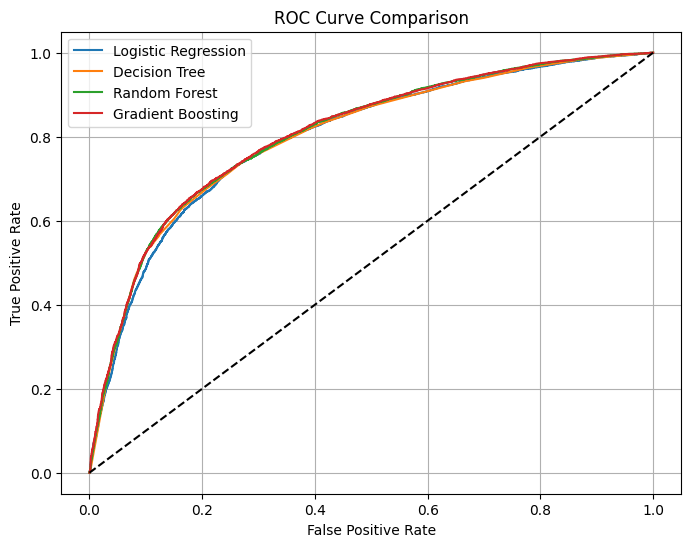

In [ ]:
# Plotting ROC curve to visually compare classification performance of models

plt.figure(figsize=(8,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr_rf, tpr_rf, label="Random Forest")

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_proba)
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting")

# Reference line
plt.plot([0,1],[0,1],'k--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

### 19. Precision–Recall Curve

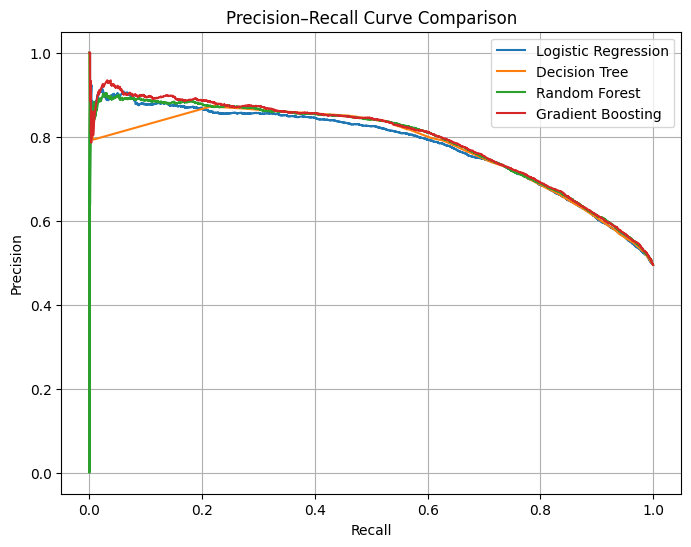

Average Precision LR : 0.7814556757990401
Average Precision DT : 0.7773928932767473
Average Precision RF : 0.7893085029431242
Average Precision GB : 0.7935433709337857


In [ ]:
# Plotting Precision–Recall curve to analyze model effectiveness on medical classification problem

from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))

precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_proba)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_proba)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_proba)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_proba)

plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_dt, precision_dt, label="Decision Tree")
plt.plot(recall_rf, precision_rf, label="Random Forest")
plt.plot(recall_gb, precision_gb, label="Gradient Boosting")

plt.title("Precision–Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

print("Average Precision LR :", average_precision_score(y_test, lr_proba))
print("Average Precision DT :", average_precision_score(y_test, dt_proba))
print("Average Precision RF :", average_precision_score(y_test, rf_proba))
print("Average Precision GB :", average_precision_score(y_test, gb_proba))

### 20. Confusion Matrix Heatmap

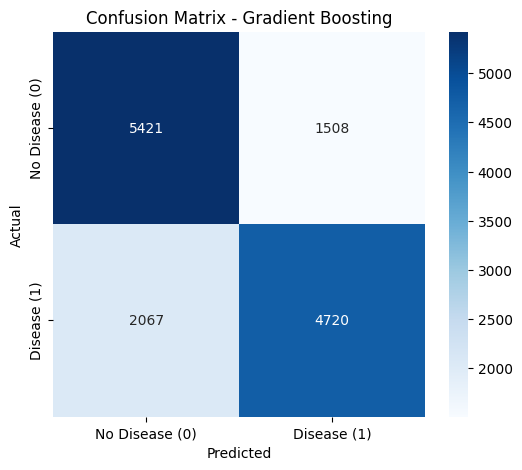

[[5421 1508]
 [2067 4720]]


In [ ]:
# Visualizing confusion matrix to understand True Positive, False Positive, True Negative, False Negative values

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example: For Gradient Boosting (best model)
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["No Disease (0)", "Disease (1)"],
            yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(cm)

### 21. Pick Best Model + Save

In [ ]:
# Selecting best performing model and saving model + scaler for deployment

import pickle

best_model = gb_model

pickle.dump(best_model, open("cardio_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))